<a href="https://colab.research.google.com/github/leobioinf0/visualitzacio_exploratoria/blob/main/S04_T01_Visualitzacio_grafica_dun_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nivell 1

## Exercici 1
Resumeix gràficament el data set [DelayedFlights.csv](https://www.kaggle.com/giovamata/airlinedelaycauses)

Crea almenys una visualització per:

* Una variable categòrica (UniqueCarrier)
* Una variable numèrica (ArrDelay)
* Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
* Dues variables numèriques (ArrDelay i DepDelay)
* Tres variables (ArrDelay, DepDelay i UniqueCarrier)
* Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [173]:
df = pd.read_csv("./DelayedFlights.csv", index_col=0)
df = df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0
18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,4,N674AA,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0


### A categorical variable (UniqueCarrier). Histogram

In [145]:
pd.DataFrame(df['UniqueCarrier'].value_counts()).T

,WN,AA,MQ,UA,OO,DL,XE,US,CO,EV,NW,YV,FL,OH,B6,9E,AS,F9,HA,AQ
UniqueCarrier,203559,132257,97555,95465,88991,72252,72008,59508,58958,56781,54744,50646,46991,39292,38232,35630,24012,15940,4325,340


Text(0.5, 1.0, 'UniqueCarrier histogram')

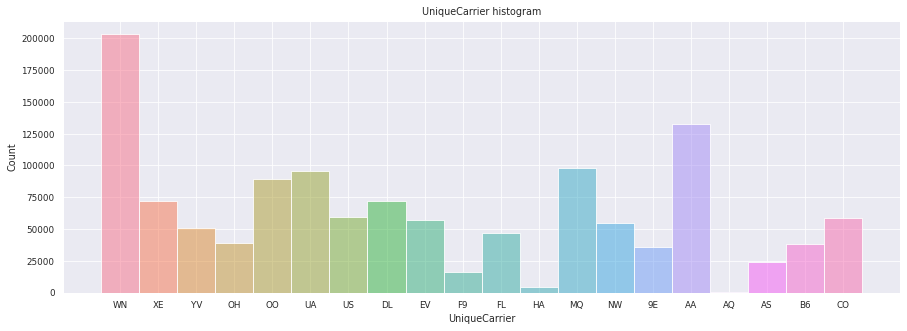

In [146]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set_context("paper")
ax1 = sns.histplot(data=df, x="UniqueCarrier", hue="UniqueCarrier",legend=False)
plt.title("UniqueCarrier histogram")

### A numerical variable (ArrDelay). Distribution plot

Text(0.5, 1.0, 'ArrDelay distribution')

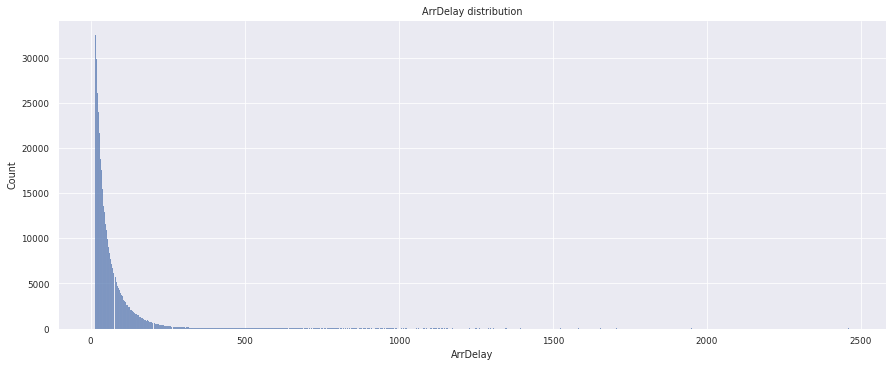

In [147]:
ax2 = sns.displot(data=df, x="ArrDelay", height=5, aspect=2.5)
plt.title("ArrDelay distribution")

### A numeric and a categorical variable (ArrDelay and UniqueCarrier). Boxplot

Text(0.5, 1.0, 'ArrDelay by UniqueCarrier boxplot')

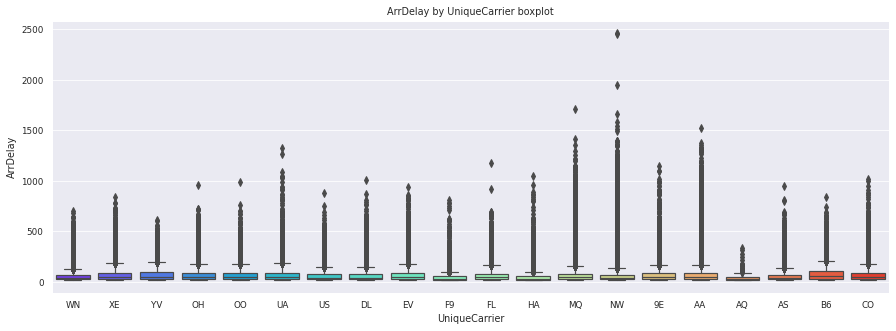

In [148]:
ax3 = sns.boxplot(x='UniqueCarrier',y='ArrDelay',data=df, palette='rainbow')
plt.title("ArrDelay by UniqueCarrier boxplot")

### Two numerical variables (ArrDelay i DepDelay). Scatterplot

Text(0.5, 1.0, 'ArrDelay by DepDelay scatterplot')

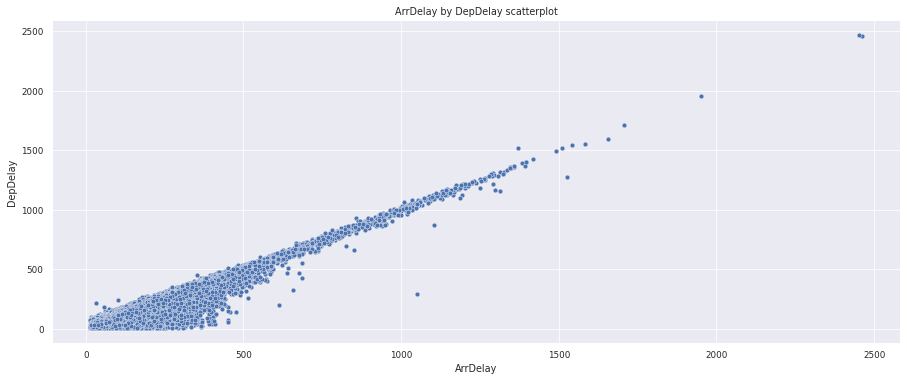

In [149]:
ax4 = sns.relplot(x="ArrDelay", y="DepDelay", height=5, aspect=2.5, data=df, kind='scatter');
plt.title("ArrDelay by DepDelay scatterplot")

### Tres variables (ArrDelay, DepDelay i UniqueCarrier) 4 X 5 FacetGrid Scatterplot

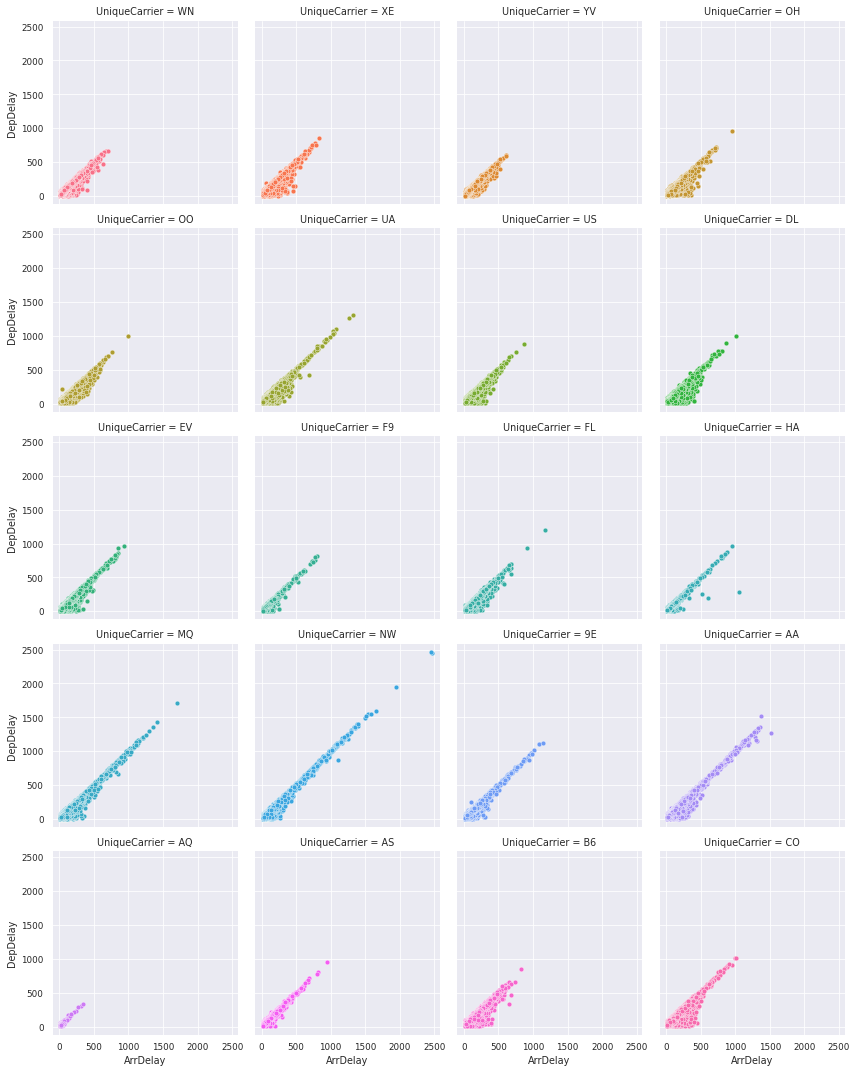

In [150]:
ax5 = sns.FacetGrid(df, col = "UniqueCarrier", hue = "UniqueCarrier", col_wrap=4)
ax5.map(sns.scatterplot, "ArrDelay", "DepDelay")

### More than three variables (ArrDelay, DepDelay, AirTime i UniqueCarrier). 3D Scatter + color identification

Text(0.5, 0.92, 'ArrDelay by DepDelay by AirTime by UniqueCarrier 3D scatterplot')

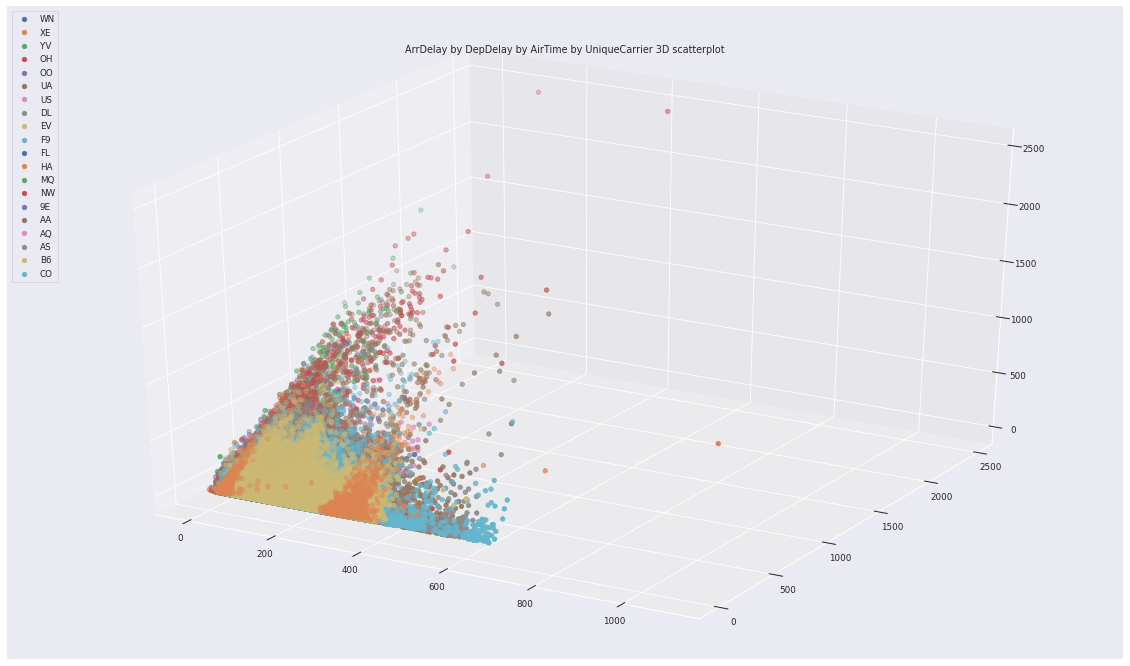

In [174]:
fig = plt.figure(figsize=(20,12))
ax6 = fig.add_subplot(111, projection='3d')
for s in df.UniqueCarrier.unique():
    ax6.scatter(df.AirTime[df.UniqueCarrier==s],
                df.DepDelay[df.UniqueCarrier==s],
                df.ArrDelay[df.UniqueCarrier==s],
                label=s)
plt.legend(loc='upper left')
plt.title("ArrDelay by DepDelay by AirTime by UniqueCarrier 3D scatterplot")


## Exercici 2
Exporta els gràfics com imatges o com html.

In [155]:
ax1.get_figure().savefig('01-UniqueCarrier.png')
ax2.savefig('02-ArrDelay.png')
ax3.get_figure().savefig('03-ArrDelayVsUniqueCarrier.png')
ax4.savefig('04-ArrDelayVsDepDelay.png')
ax5.savefig('05-ArrDelayVsDepDelayVsUniqueCarrier.png')
ax6.get_figure().savefig('06-ArrDelayVsDepDelayVsAirTimeVsUniqueCarrier.png')

## Exercici 3
Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.

Variables that will be used:
- **Year, Month, DayofMonth**: dates of the flight
- **CRSDepTime** and **CRSArrTime** : scheduled times of take-off and landing
- **DepTime** and **ArrTime**: real times at which take-off and landing took place
- **DepDelay** and **ArrDelay**: difference (in minutes) between planned and real times
- **Distance**: distance (in miles)
- **AirTime**: time (in minutes) in air. 

In [156]:
df = pd.read_csv("./DelayedFlights.csv", index_col=0)

#I only select the columns that I consider relevant.
df = df[["Year","Month","DayofMonth","DepTime","CRSDepTime","ArrTime","CRSArrTime","AirTime","ArrDelay","DepDelay","Distance","Origin","Dest"]]

#Drop nulls an inf
df = df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)
df.head()

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,ArrDelay,DepDelay,Distance,Origin,Dest
0,2008,1,3,2003.0,1955,2211.0,2225,116.0,-14.0,8.0,810,IAD,TPA
1,2008,1,3,754.0,735,1002.0,1000,113.0,2.0,19.0,810,IAD,TPA
2,2008,1,3,628.0,620,804.0,750,76.0,14.0,8.0,515,IND,BWI
4,2008,1,3,1829.0,1755,1959.0,1925,77.0,34.0,34.0,515,IND,BWI
5,2008,1,3,1940.0,1915,2121.0,2110,87.0,11.0,25.0,688,IND,JAX


Fes un informe complet del data set:.

* Resumeix estadísticament les columnes d’interès
* Troba quantes dades faltants hi ha per columna
* Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
* Taula de les aerolínies amb més endarreriments acumulats
* Quins són els vols més llargs? I els més endarrerits?
Etc.


### Descriptive statistics.

In [157]:
#Summarize descriptive statistics.
df.describe()

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,ArrDelay,DepDelay,Distance
count,1928371.0,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06
mean,2008.0,6.107855e+00,1.575206e+01,1.518648e+03,1.467718e+03,1.610242e+03,1.634196e+03,1.082771e+02,4.219988e+01,4.309169e+01,7.649486e+02
std,0.0,3.480753e+00,8.776566e+00,4.504352e+02,4.247281e+02,5.480009e+02,4.646284e+02,6.864261e+01,5.678472e+01,5.326600e+01,5.738858e+02
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01
25%,2008.0,3.000000e+00,8.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02
50%,2008.0,6.000000e+00,1.600000e+01,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02
75%,2008.0,9.000000e+00,2.300000e+01,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,1.370000e+02,5.600000e+01,5.300000e+01,9.970000e+02
max,2008.0,1.200000e+01,3.100000e+01,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03


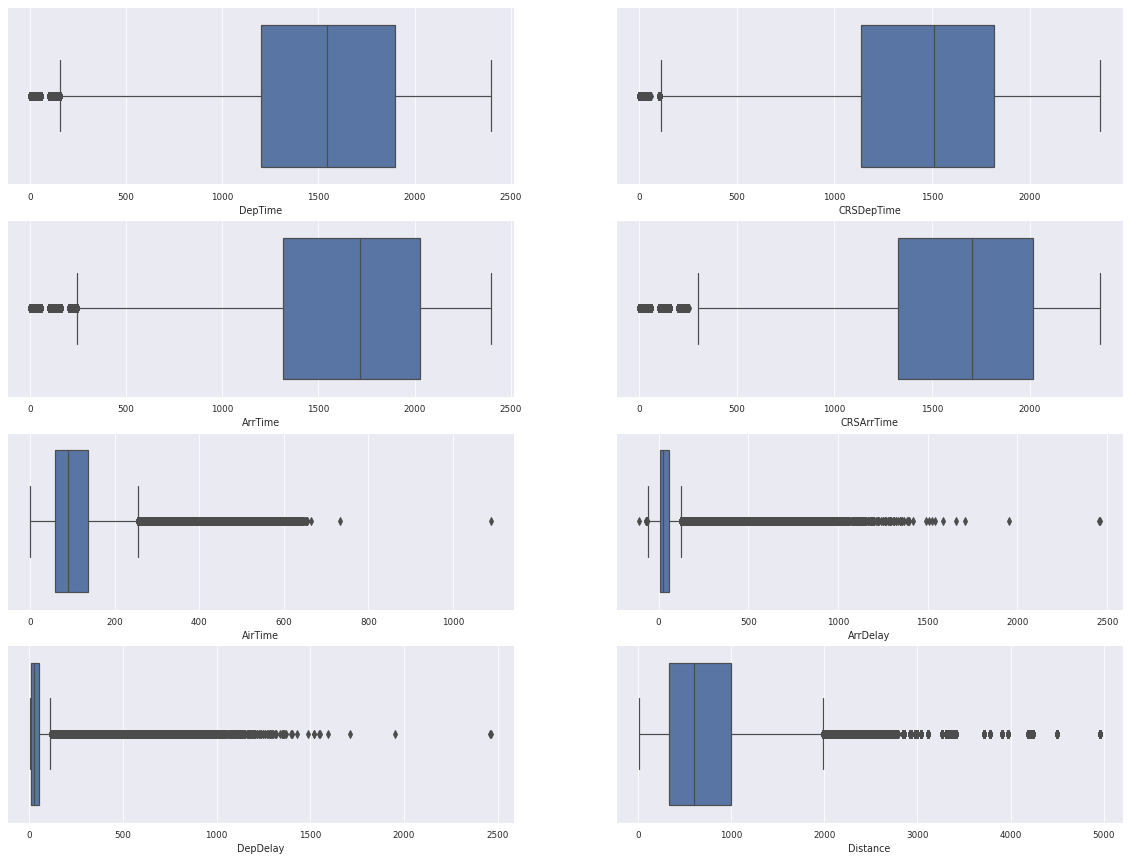

In [158]:
fig, axes = plt.subplots(4, 2,figsize=(20,15))
axes = axes.flatten()
ax = sns.boxplot(x="DepTime", data=df, orient='v', ax=axes[0])
ax = sns.boxplot(x="CRSDepTime", data=df, orient='v', ax=axes[1])
ax = sns.boxplot(x="ArrTime", data=df, orient='v', ax=axes[2])
ax = sns.boxplot(x="CRSArrTime", data=df, orient='v', ax=axes[3])
ax = sns.boxplot(x="AirTime", data=df, orient='v', ax=axes[4])
ax = sns.boxplot(x="ArrDelay", data=df, orient='v', ax=axes[5])
ax = sns.boxplot(x="DepDelay", data=df, orient='v', ax=axes[6])
ax = sns.boxplot(x="Distance", data=df, orient='v', ax=axes[7])

### Create new columns

#### Average flight speed

In [159]:
#Create new columns (average flight speed, whether you arrived late or not ...).

##Average flight speed
df['AvgSpeed'] = round(60*df['Distance']/df['AirTime'])
df = df.replace([np.inf, -np.inf], np.nan)
df.head()

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,ArrDelay,DepDelay,Distance,Origin,Dest,AvgSpeed
0,2008,1,3,2003.0,1955,2211.0,2225,116.0,-14.0,8.0,810,IAD,TPA,419.0
1,2008,1,3,754.0,735,1002.0,1000,113.0,2.0,19.0,810,IAD,TPA,430.0
2,2008,1,3,628.0,620,804.0,750,76.0,14.0,8.0,515,IND,BWI,407.0
4,2008,1,3,1829.0,1755,1959.0,1925,77.0,34.0,34.0,515,IND,BWI,401.0
5,2008,1,3,1940.0,1915,2121.0,2110,87.0,11.0,25.0,688,IND,JAX,474.0


In [160]:
df.groupby(by="Month")["AvgSpeed"].mean()

Month
1     393.734579
2     392.257714
3     395.613180
4     396.765698
5     398.829899
6     397.857615
7     400.477568
8     404.030252
9     398.151912
10    399.247546
11    394.471212
12    394.078379
Name: AvgSpeed, dtype: float64

Text(0.5, 1.0, 'AvgSpeed by Month')

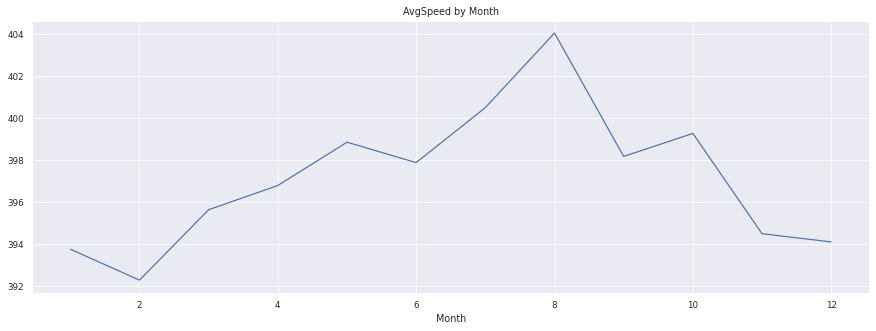

In [161]:
df.groupby(by="Month")["AvgSpeed"].mean().plot()
plt.title("AvgSpeed by Month")

#### Arrived late (T/F)

In [162]:
#Whether the flight arrived late or not
df['ArrLate'] = df['ArrDelay']>0
df.head(3)

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,ArrDelay,DepDelay,Distance,Origin,Dest,AvgSpeed,ArrLate
0,2008,1,3,2003.0,1955,2211.0,2225,116.0,-14.0,8.0,810,IAD,TPA,419.0,False
1,2008,1,3,754.0,735,1002.0,1000,113.0,2.0,19.0,810,IAD,TPA,430.0,True
2,2008,1,3,628.0,620,804.0,750,76.0,14.0,8.0,515,IND,BWI,407.0,True


Text(0.5, 1.0, 'ArrLate piechart')

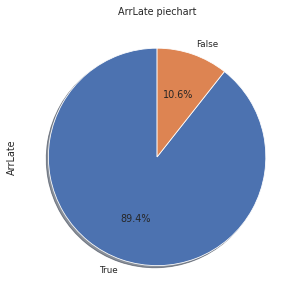

In [163]:
df["ArrLate"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("ArrLate piechart")

#### Date of the flight

In [164]:
## Date of the flight
df['Date'] = pd.to_datetime(df.Year.astype(str)+'-'+ df.Month.astype(str)+'-'+ df.DayofMonth.astype(str))
df.head()

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,ArrDelay,DepDelay,Distance,Origin,Dest,AvgSpeed,ArrLate,Date
0,2008,1,3,2003.0,1955,2211.0,2225,116.0,-14.0,8.0,810,IAD,TPA,419.0,False,2008-01-03
1,2008,1,3,754.0,735,1002.0,1000,113.0,2.0,19.0,810,IAD,TPA,430.0,True,2008-01-03
2,2008,1,3,628.0,620,804.0,750,76.0,14.0,8.0,515,IND,BWI,407.0,True,2008-01-03
4,2008,1,3,1829.0,1755,1959.0,1925,77.0,34.0,34.0,515,IND,BWI,401.0,True,2008-01-03
5,2008,1,3,1940.0,1915,2121.0,2110,87.0,11.0,25.0,688,IND,JAX,474.0,True,2008-01-03


Text(0.5, 1.0, 'Time serie of average speed')

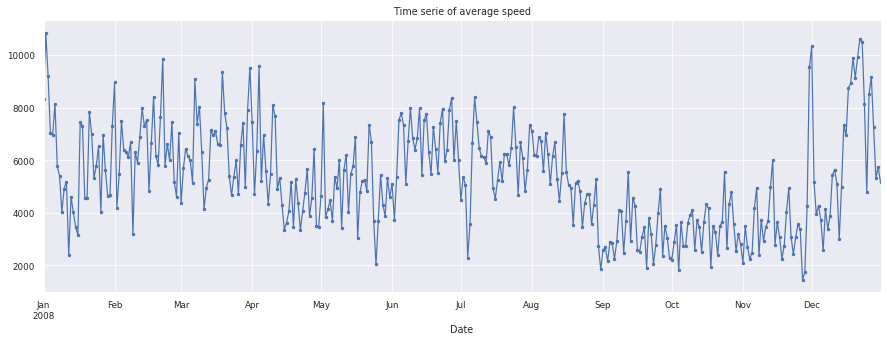

In [165]:
df.groupby(by="Date")["AvgSpeed"].count().plot(marker='.')
plt.title("Time serie of average speed")

#### Taula de les aerolínies amb més endarreriments acumulats

Since this table does not contain the name of the airlines, I will calculate the delay percentage for each destination airport. 

Even if the object of study was changed, the exploration process would be the same.

In [166]:
#Delay percentage for each destination airport
ArrLateMean_df=round(pd.DataFrame(df.groupby(['Dest'])['ArrLate'].mean()),3)*100
#Rename column
ArrLateMean_df = ArrLateMean_df.rename(columns={'ArrLate': 'ArrLateMean'})
#Descending sort 
ArrLateMean_df.sort_values('ArrLateMean', ascending=False, inplace=True)
#top 10
ArrLateMean_df.head(10)

,ArrLateMean
Dest,
PIR,100.0
TUP,100.0
BPT,100.0
DLG,100.0
TEX,100.0
INL,100.0
SPI,99.2
ITO,99.2
MKG,99.0


Text(0.5, 1.0, 'Delay percentage for each destination airport. Top 10')

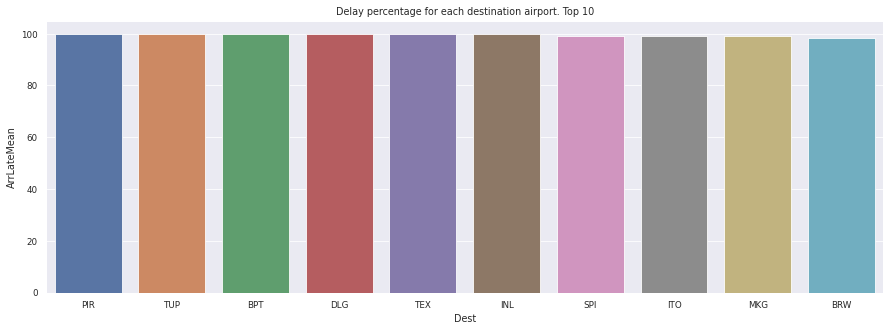

In [167]:
sns.barplot(ArrLateMean_df.head(10).index, ArrLateMean_df.head(10).ArrLateMean)
plt.title("Delay percentage for each destination airport. Top 10")

#### Longest flights

In [168]:
##What are the longest flights?
#Join Distance-Origin-Destination. In case there are routes with different 
#distances for the same origin-destination combinations 
Dist_Ori_Dest = df.Distance.astype(str)+"-"+df.Origin+"-"+df.Dest
#unique values
Dist_Ori_Dest = Dist_Ori_Dest.unique()
Dist_Ori_Dest_df = pd.DataFrame(Dist_Ori_Dest)
#disjoin
Dist_Ori_Dest_df = Dist_Ori_Dest_df[0].str.split("-",expand=True,)
# convert distance from string to number
Dist_Ori_Dest_df[0] = Dist_Ori_Dest_df[0].astype(float)
#Sort by distance and top 10
Dist_Ori_Dest_df = Dist_Ori_Dest_df.sort_values(by=0, ascending=False).reset_index(drop=True).head(10)
Dist_Ori_Dest_df

,0,1,2
0,4962.0,EWR,HNL
1,4962.0,HNL,EWR
2,4502.0,ATL,HNL
3,4502.0,HNL,ATL
4,4243.0,HNL,ORD
5,4243.0,ORD,HNL
6,4213.0,KOA,ORD
7,4184.0,ORD,OGG
8,3972.0,HNL,MSP
9,3972.0,MSP,HNL


Text(0.5, 1.0, 'Longest flights. Top 10')

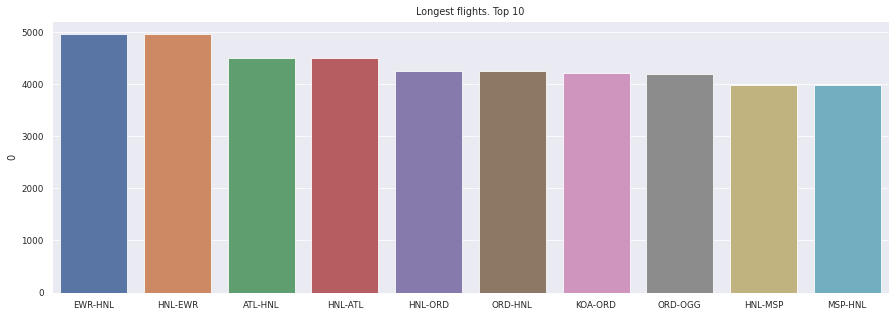

In [169]:
sns.barplot(Dist_Ori_Dest_df[1]+"-"+Dist_Ori_Dest_df[2], Dist_Ori_Dest_df[0])
plt.title("Longest flights. Top 10")

In [170]:
#Flights with more delays

#Join rigin-Destination.
df["OriDest"] = df.Origin+"-"+df.Dest
#Delay percentage
flights_delays = round(df.groupby(['OriDest'])['ArrLate'].mean(),4)*100
#Sort and top 10
flights_delays = flights_delays.sort_values(ascending=False).head(10)
flights_delays

OriDest
BOS-ACK    100.0
CVG-TOL    100.0
SRQ-STL    100.0
SRQ-TPA    100.0
BOS-BNA    100.0
IND-SEA    100.0
STL-AUS    100.0
CHO-DCA    100.0
LNK-PIA    100.0
HRL-IAH    100.0
Name: ArrLate, dtype: float64

Text(0.5, 1.0, 'Flights with more delays. Top 10')

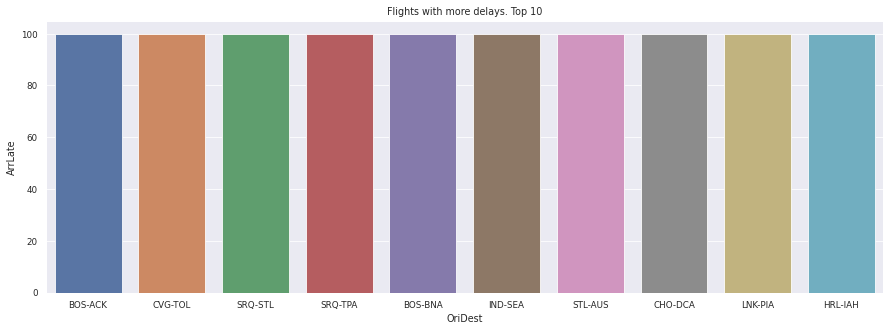

In [171]:
sns.barplot(flights_delays.index, flights_delays)
plt.title("Flights with more delays. Top 10")